<a href="https://colab.research.google.com/github/tmoura/softexIA/blob/main/DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

### Gerando artificialmente um dataset para Clustering

In [ ]:
# dataset gerado automaticamente com 2 features

X, y = make_blobs(n_samples=750, centers=3, cluster_std=0.4, random_state=0)

In [10]:
# Instância do DBSCAN e aprendizado
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels


array([ 0,  1,  0,  0,  2,  2,  1,  1,  2,  2,  0,  1,  0,  1,  1,  0,  2,
        0,  1, -1,  0,  0,  2,  0,  1,  1,  2,  2,  0,  0,  2,  0,  0,  0,
        1,  1,  2,  2,  1,  2,  2,  2,  0,  1,  1,  2,  1,  1,  2,  2,  1,
       -1,  2,  0,  2,  0,  0,  1,  1,  0,  2,  0,  1,  0,  2,  0,  2,  1,
        1,  2,  2,  2,  0,  1,  0,  2,  2,  0,  2,  1,  0,  1,  1,  1,  2,
        0,  1,  1,  2,  2,  2,  1,  0,  0,  1,  2,  0,  2,  1,  1,  1,  1,
        1,  1,  0,  0,  2,  2,  0,  2,  1,  2,  0,  2,  0,  2,  0,  1,  0,
        1,  1,  0,  2,  0,  2,  2,  2,  1,  2,  0,  2,  2,  2,  0,  1,  2,
        1,  1,  1,  1,  0,  2,  2,  0,  0,  1,  2,  0,  0,  0,  2,  0,  1,
        0,  2,  2,  2,  1,  2,  1,  0,  2,  1,  0,  1,  2,  1,  2,  1,  0,
        1,  1,  1,  2,  2,  0,  2,  2,  2,  0,  1,  2,  2,  2,  2,  2,  0,
        2, -1,  2,  1,  0,  2,  1,  1,  2,  0,  0,  0,  1,  2,  1,  0,  2,
        2,  2,  1,  0,  0,  2,  0,  2,  0,  2,  0,  1,  1,  0,  1, -1,  1,
        1,  2,  1,  2,  1

In [11]:
# labels (rótulos de grupos)
np.unique(labels)

array([-1,  0,  1,  2])

In [12]:
# Número de clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de outliers ou ruídos: %d" % n_noise_)
print("Índice Silhouette: %0.3f" % metrics.silhouette_score(X, labels))


Número estimado de clusters: 3
Número estimado de outliers ou ruídos: 24
Índice Silhouette: 0.725


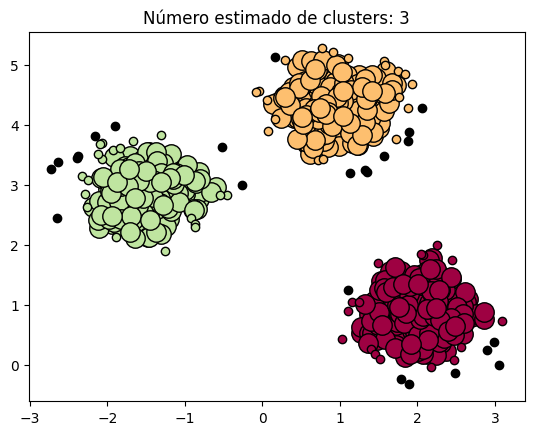

In [13]:
# Plotando resultados
import matplotlib.pyplot as plt

# a cor preta será usada para identificar os ruídos
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # preto para outliers
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Número estimado de clusters: %d" % n_clusters_)
plt.show()